# IPython & Jupyter

Relevant resources:

[Cyrille Rossant 法国神经学家](http://cyrille.rossant.net/)

+ [Learning IPython for Interactive Computing and Data Visualization](http://ipython-books.github.io/minibook/):Beginner-level introduction to Python for data analysis  
+ [IPython Interactive Computing and Visualization Cookbook](http://ipython-books.github.io/cookbook/):Advanced-level book covers a wide range of methods for data science with Python

# Reproducible Data Analysis in Jupyter

Coding time:
- Writing & test 40%
- Refactoring 40%
- Style & doc 20%

## Part 1: Loading and Visualizing Data

Relevant resources:

- [Fremont Bridge Bike Counter](http://www.seattle.gov/transportation/bikecounter_fremont.htm): the website where you can explore the data

- [A Whirlwind Tour of Python](https://github.com/jakevdp/WhirlwindTourOfPython): Jake Vanderplas book introducing the Python programming language, aimed at scientists and engineers.

- [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook): Jake Vanderplas book introducing Python's data science tools, including an introduction to the IPython, Pandas, and Matplotlib tools used here.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)  

import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['SimHei','Arial']})


In [1]:
from jupyterworkflow.data import get_fremont_data

data = get_fremont_data()

data.head()

,west,east,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


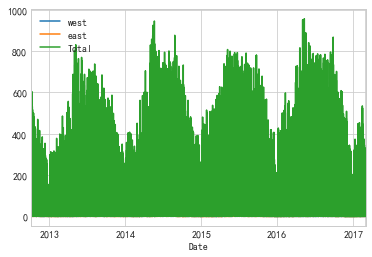

In [6]:
data.plot();

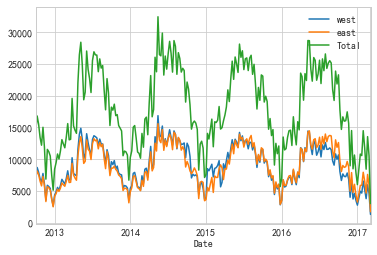

In [9]:
data.resample('W').sum().plot();

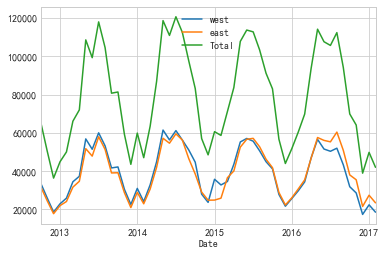

In [10]:
data.resample('M').sum().plot();

## Part 2: Further Data Exploration

*I do some slightly more sophisticated visualization with the data, using matplotlib and pandas.*

Relevant Resources:

- [Pivot Tables Section](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.09-Pivot-Tables.ipynb) from the Python Data Science Handbook

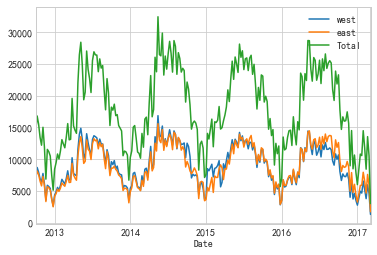

In [11]:
data.resample('W').sum().plot();

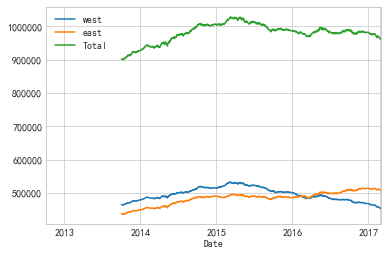

In [13]:
data.resample('D').sum().rolling(365).sum().plot();

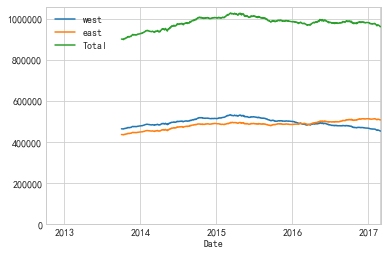

In [14]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

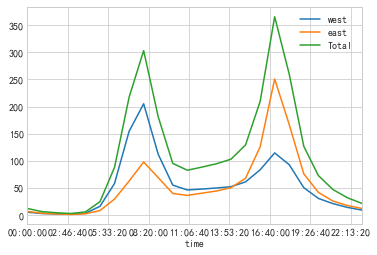

In [17]:
data.groupby(data.index.time).mean().plot();

In [18]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :3]

,2012-10-03,2012-10-04,2012-10-05
00:00:00,13.0,18.0,11.0
01:00:00,10.0,3.0,8.0
02:00:00,2.0,9.0,7.0
03:00:00,5.0,3.0,4.0
04:00:00,7.0,8.0,9.0


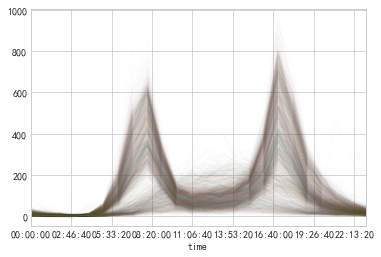

In [19]:
pivoted.plot(legend=False, alpha=0.01);

# Part 9: Further Data Exploration: PCA and GMM

*Apply unsupervised learning techniques to the data to explore what we can learn from it*

对一周不同时段（工作日、节假日和双休日）的骑车人数进行聚类分析

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## 获取数据

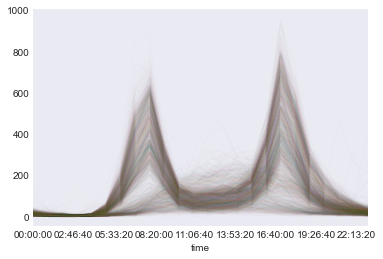

In [21]:
from jupyterworkflow.data import get_fremont_data

data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## 主成分分析

In [22]:
X = pivoted.fillna(0).T.values
X.shape

(1610, 24)

In [23]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [24]:
X2.shape

(1610, 2)

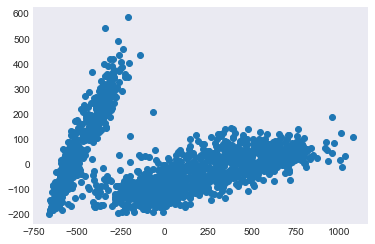

In [25]:
plt.scatter(X2[:, 0], X2[:, 1]);

## 无监督分类

In [26]:
gmm = GaussianMixture(2).fit(X)

labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

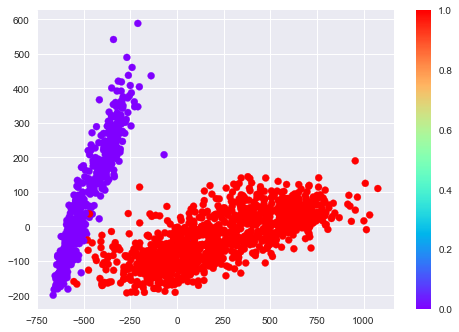

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow');
plt.colorbar();

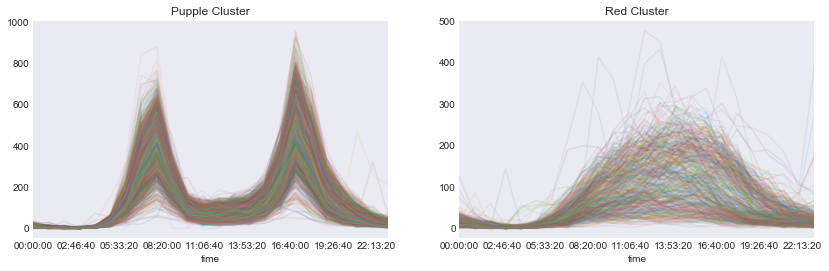

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Pupple Cluster')
ax[1].set_title('Red Cluster');

## 工作日 VS 节假日

In [28]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            6, 0, 1, 2, 3, 4, 5, 6, 0, 1],
           dtype='int64', length=1610)

下图是双休日与节假日的自行车车数

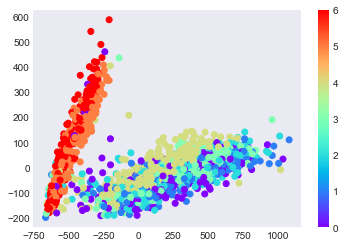

In [29]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow');
plt.colorbar();

## 异常值分析

In [30]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek<5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06'],
              dtype='datetime64[ns]', freq=None)

2017-02-06的寒流：[http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/](http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)

Relevant Resources:

- [Principal Component Analysis In-Depth](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb) from the Python Data Science Handbook
- [Gaussian Mixture Models In-Depth](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb) from the Python Data Science Handbook
- [Learning Seattle's Work Habits from Bicycle Counts](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/): My 2015 blog post using Fremont Bridge data

<small>
*This post was composed within an IPython notebook; you can view a static version [here](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/JupyterWorkflow.ipynb) or download the full source [here](http://jakevdp.github.com/downloads/notebooks/JupyterWorkflow.ipynb).*
</small>